<a href="https://colab.research.google.com/github/MCPMAlf/An-lisis-de-Datos/blob/main/Proyecyo4_Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Entrena una red neuronal para que reproduzca la siguientes funciones en
#el intervalo de [-1,1]. Graficar la solución de la red en conjunto con la
#gráfica de la función.

In [111]:
#Importamos librerias

import numpy as np
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.losses import CategoricalCrossentropy, MSE,MAE

In [140]:
###############################################
###########GENERACIÓN DE DATOS#################
###############################################

#Valores de x
x_val = (np.random.rand(5000)*2)-1

#Función 1: 3sin(Pix)
f1 = lambda x: 3*np.sin(np.pi*x)
f2 = lambda x: 1 + 2*x + 4*(x**(3))

#Datos de entrenamiento y prueba

x_train = x_val[0:2800]
x_test = x_val[2801:5000]

y_train = f1(x_train)
y_test = f1(x_test)

y2_train = f2(x_train)
y2_test = f2(x_test)


In [141]:
#Parámetros Funcion 1: 3sin(pi*x)

Learning_Rate = 0.001998
epochs = 150
batch_size = 115

In [131]:
model = Sequential()
model.add(Dense(180, activation='tanh', input_shape=(1,)))
model.add(Dense(100, activation='tanh'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(1))

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 180)               360       
                                                                 
 dense_74 (Dense)            (None, 100)               18100     
                                                                 
 dense_75 (Dense)            (None, 50)                5050      
                                                                 
 dense_76 (Dense)            (None, 1)                 51        
                                                                 
Total params: 23,561
Trainable params: 23,561
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.compile(loss=MAE, optimizer = Adam (learning_rate=Learning_Rate*1), metrics=['RootMeanSquaredError'])

In [133]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs*1,
                    verbose=1,
                    validation_data=(x_test, y_test)
                    )

Epoch 1/150
25/25 [==============================] - 1s 12ms/step - loss: 1.1724 - root_mean_squared_error: 1.4566 - val_loss: 0.9397 - val_root_mean_squared_error: 1.1661
Epoch 2/150
25/25 [==============================] - 0s 7ms/step - loss: 0.6383 - root_mean_squared_error: 0.9014 - val_loss: 0.5078 - val_root_mean_squared_error: 0.6117
Epoch 3/150
25/25 [==============================] - 0s 7ms/step - loss: 0.4483 - root_mean_squared_error: 0.5984 - val_loss: 0.4184 - val_root_mean_squared_error: 0.5706
Epoch 4/150
25/25 [==============================] - 0s 7ms/step - loss: 0.3765 - root_mean_squared_error: 0.5464 - val_loss: 0.3799 - val_root_mean_squared_error: 0.5838
Epoch 5/150
25/25 [==============================] - 0s 8ms/step - loss: 0.3509 - root_mean_squared_error: 0.5106 - val_loss: 0.3452 - val_root_mean_squared_error: 0.4751
Epoch 6/150
25/25 [==============================] - 0s 8ms/step - loss: 0.3345 - root_mean_squared_error: 0.4777 - val_loss: 0.3524 - val_root_

In [134]:
score = model.evaluate(x_test, y_test, verbose=1)
print(score)

69/69 [==============================] - 0s 2ms/step - loss: 0.0233 - root_mean_squared_error: 0.0343
[0.02331155724823475, 0.034288302063941956]


4/4 [==============================] - 0s 5ms/step


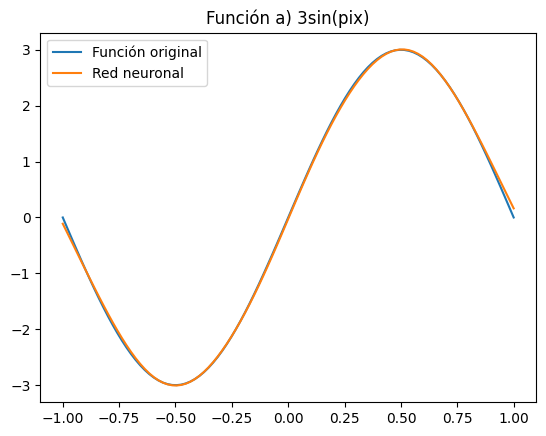

In [135]:
#Evaluando en el intervalo [-1,1]
intervalo = np.linspace(-1,1,100)

prediccion = model.predict(intervalo)
valores_intervalo = f1(intervalo)

# Graficar función original y solución de la red
plt.plot(intervalo, valores_intervalo, label='Función original')
plt.plot(intervalo, prediccion, label='Red neuronal')
plt.legend()
plt.title('Función a) 3sin(pix)')
plt.show()

In [142]:
#Modelo Función 2:

model_2 = Sequential()
model_2.add(Dense(180, activation='tanh', input_shape=(1,)))
model_2.add(Dense(100, activation='tanh'))
model_2.add(Dense(50, activation='tanh'))
model_2.add(Dense(1))

model_2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 180)               360       
                                                                 
 dense_82 (Dense)            (None, 100)               18100     
                                                                 
 dense_83 (Dense)            (None, 50)                5050      
                                                                 
 dense_84 (Dense)            (None, 1)                 51        
                                                                 
Total params: 23,561
Trainable params: 23,561
Non-trainable params: 0
_________________________________________________________________


In [143]:
model_2.compile(loss=MAE, optimizer = Adam (learning_rate=Learning_Rate*1), metrics=['RootMeanSquaredError'])

In [144]:
history_2 = model_2.fit(x_train, y2_train,
                    batch_size=batch_size,
                    epochs=epochs*1,
                    verbose=1,
                    validation_data=(x_test, y2_test)
                    )

Epoch 1/150
25/25 [==============================] - 1s 13ms/step - loss: 0.9181 - root_mean_squared_error: 1.3045 - val_loss: 0.6638 - val_root_mean_squared_error: 0.9944
Epoch 2/150
25/25 [==============================] - 0s 7ms/step - loss: 0.5652 - root_mean_squared_error: 0.7838 - val_loss: 0.5835 - val_root_mean_squared_error: 0.8466
Epoch 3/150
25/25 [==============================] - 0s 8ms/step - loss: 0.5463 - root_mean_squared_error: 0.7536 - val_loss: 0.5709 - val_root_mean_squared_error: 0.8072
Epoch 4/150
25/25 [==============================] - 0s 7ms/step - loss: 0.5342 - root_mean_squared_error: 0.7345 - val_loss: 0.5641 - val_root_mean_squared_error: 0.8276
Epoch 5/150
25/25 [==============================] - 0s 7ms/step - loss: 0.5199 - root_mean_squared_error: 0.7129 - val_loss: 0.5428 - val_root_mean_squared_error: 0.7945
Epoch 6/150
25/25 [==============================] - 0s 6ms/step - loss: 0.5047 - root_mean_squared_error: 0.7011 - val_loss: 0.5284 - val_root_

4/4 [==============================] - 0s 5ms/step


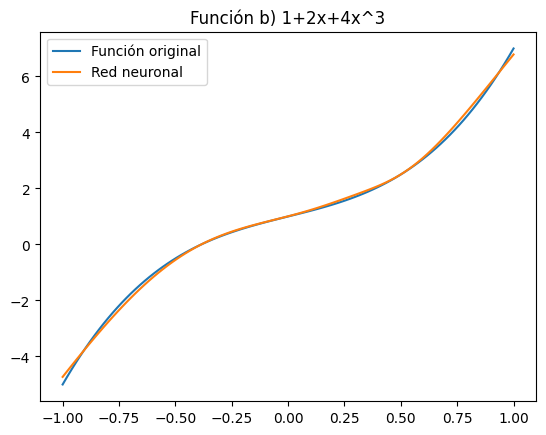

In [145]:
#Evaluando en el intervalo [-1,1]

prediccion_2 = model_2.predict(intervalo)
valores_2_intervalo = f2(intervalo)

# Graficar función original y solución de la red
plt.plot(intervalo, valores_2_intervalo, label='Función original')
plt.plot(intervalo, prediccion_2, label='Red neuronal')
plt.legend()
plt.title('Función b) 1+2x+4x^3')
plt.show()